**Predicting House Prices and evaluating variables**

In this project, we will test out several supervised algorithms to accurately model house prices using data collected from Ames, Iowa. We will then choose the best candidate algorithm from preliminary results and further optimize this algorithm to best model the data. Our goal with this implementation is to construct a model that accurately predicts the price of the house.

We'll be using the following names throughout the notebook-

traindata = train dataset

testdata = test dataset

traindata_updated = Train data without SalePrice

finaldataset = Test and train data appended together

traindata_updated_ = Train Data after removing NULL values and working on skewness

testdata_ = Test Data after removing NULL values and working on skewness

X_train, X_test, y_train, y_test = Train and test data split with 80-20 from traindata

predictions = Predicted data to be submitted


**Exploring the data**

Let's start with importing the necessary libaries, reading in the data, and checking out the dataset.

Note that the last column from this dataset, 'SalePrice', will be our target label (to predict the price of the house). All other columns are features about each house in the database.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from IPython.display import display # Allows the use of display() for DataFrames
from scipy.stats import skew #To check for skewness

# Import visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Pretty display for notebooks
%matplotlib inline

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
#Let's load our data
traindata = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
testdata = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

# Success - Display the first record of training data
display(traindata.head(n=1))
display(testdata.head(n=1))

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal


In [2]:
traindata.shape, testdata.shape
#Checking out the datatypes of the features
traindata.info()
testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

There are a total of 81 columns in the train data set. We also have a lot of null values as is visible.

**Preparing the data**

Before data can be used as input for machine learning algorithms, it often must be cleaned, formatted, and restructured — this is typically known as preprocessing. For this dataset, there are a lot of invalid or missing entries we must deal with. This preprocessing can help tremendously with the outcome and predictive power of nearly all learning algorithms.

In [3]:
traindata.describe(include = "all")

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.750000,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,1095.250000,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


Identifying and removing null values

In [4]:
traindata.isnull()
testdata.isnull()
# True means null values

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,False,False,False,False,False,False,True,False,False,False,...,False,False,True,False,True,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,False,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,False,True,False,True,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,False,True,True,True,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,False,True,True,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,False,False,False,False,False,False,True,False,False,False,...,False,False,True,True,True,False,False,False,False,False
1455,False,False,False,False,False,False,True,False,False,False,...,False,False,True,True,True,False,False,False,False,False
1456,False,False,False,False,False,False,True,False,False,False,...,False,False,True,True,True,False,False,False,False,False
1457,False,False,False,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [5]:
traindata.isnull().sum().sum()
#To count how many missing values are there in the dataset in row as well as column

6965

In [6]:
testdata.isnull().sum().sum()

7000

In [7]:
# Split the data into features and target label
SalePriceCheck = traindata.SalePrice
traindata_updated = traindata.drop(["SalePrice"], axis = 1)
traindata_updated["Type"]= "train"
testdata["Type"]= "test"
finaldataset = traindata_updated.append(testdata)
finaldataset.isnull().sum().sum()

13965

In [8]:
null_column_values = finaldataset[finaldataset.columns[finaldataset.isnull().sum()>0]] #printing null values of all columns
print(null_column_values)

     MSZoning  LotFrontage Alley Utilities Exterior1st Exterior2nd MasVnrType  \
0          RL         65.0   NaN    AllPub     VinylSd     VinylSd    BrkFace   
1          RL         80.0   NaN    AllPub     MetalSd     MetalSd       None   
2          RL         68.0   NaN    AllPub     VinylSd     VinylSd    BrkFace   
3          RL         60.0   NaN    AllPub     Wd Sdng     Wd Shng       None   
4          RL         84.0   NaN    AllPub     VinylSd     VinylSd    BrkFace   
...       ...          ...   ...       ...         ...         ...        ...   
1454       RM         21.0   NaN    AllPub     CemntBd     CmentBd       None   
1455       RM         21.0   NaN    AllPub     CemntBd     CmentBd       None   
1456       RL        160.0   NaN    AllPub     VinylSd     VinylSd       None   
1457       RL         62.0   NaN    AllPub     HdBoard     Wd Shng       None   
1458       RL         74.0   NaN    AllPub     HdBoard     HdBoard    BrkFace   

      MasVnrArea BsmtQual B

Total of 34 columns have NULL values.

In [9]:
null_columns = finaldataset.columns[finaldataset.isnull().sum()>0] #finding the columns with >0 null values
print(null_columns)

Index(['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Electrical', 'BsmtFullBath',
       'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType'],
      dtype='object')


In [10]:
finaldataset.bfill(inplace=True)

In [11]:
finaldataset.isnull().sum().sum()

257

In [12]:
null_columns = finaldataset.columns[finaldataset.isnull().sum()>0]
print(null_columns)

Index(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')


We saw that bfill didn't remove Null values from 4 columns - Alley, PoolQC, Fence, MiscFeature. The total remaining values are 257. That's why we have to use a different approach to remove the null values

In [13]:
m = finaldataset["Alley"].mode()[0]
finaldataset["Alley"].fillna(m,inplace=True)
n = finaldataset["PoolQC"].mode()[0]
finaldataset["PoolQC"].fillna(n,inplace=True)
o = finaldataset["Fence"].mode()[0]
finaldataset["Fence"].fillna(o,inplace=True)
p = finaldataset["MiscFeature"].mode()[0]
finaldataset["MiscFeature"].fillna(p,inplace=True)

In [14]:
finaldataset.isnull().sum().sum()

0

In [15]:
finaldataset.skew(axis=0, numeric_only = True)

Id                0.000000
MSSubClass        1.376165
LotFrontage       1.356928
LotArea          12.829025
OverallQual       0.197212
OverallCond       0.570605
YearBuilt        -0.600114
YearRemodAdd     -0.451252
MasVnrArea        2.604367
BsmtFinSF1        1.426150
BsmtFinSF2        4.148275
BsmtUnfSF         0.919824
TotalBsmtSF       1.163352
1stFlrSF          1.470360
2ndFlrSF          0.862118
LowQualFinSF     12.094977
GrLivArea         1.270010
BsmtFullBath      0.625153
BsmtHalfBath      3.919230
FullBath          0.167692
HalfBath          0.694924
BedroomAbvGr      0.326492
KitchenAbvGr      4.304467
TotRmsAbvGrd      0.758757
Fireplaces        0.733872
GarageYrBlt      -0.376776
GarageCars       -0.217611
GarageArea        0.240973
WoodDeckSF        1.843380
OpenPorchSF       2.536417
EnclosedPorch     4.005950
3SsnPorch        11.381914
ScreenPorch       3.948723
PoolArea         16.907017
MiscVal          21.958480
MoSold            0.195985
YrSold            0.132467
d

**Normalizing Numerical Features**


In addition to performing transformations on features that are highly skewed, it is often good practice to perform some type of scaling on numerical features. Applying a scaling to the data does not change the shape of each feature’s distribution; however, normalization ensures that each feature is treated equally when applying supervised learners. Note that once scaling is applied, observing the data in its raw form will no longer have the same original meaning

In [16]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler()
int_columns = finaldataset.columns[finaldataset.dtypes=='int']
finaldataset[int_columns] = scaler.fit_transform(finaldataset[int_columns])

# Show an example of a record with scaling applied
display(finaldataset.head(n = 1))

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Type
0,0.0,0.235294,RL,65.0,0.03342,Pave,Grvl,Reg,Lvl,AllPub,...,0.0,Ex,MnPrv,Shed,0.0,0.090909,0.5,WD,Normal,train


**Data Preprocessing**

In [17]:
# Create correlation matrix
corr_matrix = finaldataset.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]

# Drop features 
finaldataset.drop(to_drop, axis=1, inplace=True)

finaldataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Type
0,0.000000,0.235294,RL,65.0,0.033420,Pave,Grvl,Reg,Lvl,AllPub,...,0.0,Ex,MnPrv,Shed,0.0,0.090909,0.50,WD,Normal,train
1,0.000343,0.000000,RL,80.0,0.038795,Pave,Grvl,Reg,Lvl,AllPub,...,0.0,Ex,MnPrv,Shed,0.0,0.363636,0.25,WD,Normal,train
2,0.000685,0.235294,RL,68.0,0.046507,Pave,Grvl,IR1,Lvl,AllPub,...,0.0,Ex,MnPrv,Shed,0.0,0.727273,0.50,WD,Normal,train
3,0.001028,0.294118,RL,60.0,0.038561,Pave,Grvl,IR1,Lvl,AllPub,...,0.0,Ex,MnPrv,Shed,0.0,0.090909,0.00,WD,Abnorml,train
4,0.001371,0.235294,RL,84.0,0.060576,Pave,Grvl,IR1,Lvl,AllPub,...,0.0,Ex,MnPrv,Shed,0.0,1.000000,0.50,WD,Normal,train


We can see there are several features for each record that are non-numeric. Typically, learning algorithms expect input to be numeric, which requires that non-numeric features (called categorical variables) be converted. One popular way to convert categorical variables is by using the one-hot encoding scheme. One-hot encoding creates a “dummy” variable for each possible category of each non-numeric feature.

Label Encoding is a popular encoding technique for handling categorical variables. In this technique, each label is assigned a unique integer based on alphabetical ordering.

We apply One-Hot Encoding when: The categorical feature is not ordinal or the number of categorical features is less so one-hot encoding can be effectively applied
We apply Label Encoding when: The categorical feature is ordinal (like Jr. kg, Sr. kg, Primary school, high school) or the number of categories is quite large as one-hot encoding can lead to high memory consumption

**Label Encoding the Categorical variables**

In [18]:
object_columns = finaldataset[finaldataset.columns[finaldataset.dtypes=='object']]
# Import label encoder 
from sklearn import preprocessing
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()
# Encode labels 
for i in object_columns:
    finaldataset[i]= label_encoder.fit_transform(finaldataset[i].values) 
print(finaldataset.head())

         Id  MSSubClass  MSZoning  LotFrontage   LotArea  Street  Alley  \
0  0.000000    0.235294         3         65.0  0.033420       1      0   
1  0.000343    0.000000         3         80.0  0.038795       1      0   
2  0.000685    0.235294         3         68.0  0.046507       1      0   
3  0.001028    0.294118         3         60.0  0.038561       1      0   
4  0.001371    0.235294         3         84.0  0.060576       1      0   

   LotShape  LandContour  Utilities  ...  PoolArea  PoolQC  Fence  \
0         3            3          0  ...       0.0       0      2   
1         3            3          0  ...       0.0       0      2   
2         0            3          0  ...       0.0       0      2   
3         0            3          0  ...       0.0       0      2   
4         0            3          0  ...       0.0       0      2   

   MiscFeature  MiscVal    MoSold  YrSold  SaleType  SaleCondition  Type  
0            2      0.0  0.090909    0.50         8        

In [19]:
#Splitting the data into train and test data
traindata_updated_ = finaldataset[finaldataset.Type==1]
traindata_updated_ = traindata_updated_.drop(["Type"], axis=1)
testdata_ = finaldataset[finaldataset.Type==0]
testdata_ = testdata_.drop(["Type"], axis=1)

In [20]:
SalePriceCheck.shape, traindata_updated_.shape, testdata_.shape

((1460,), (1460, 79), (1459, 79))

**Data Visualization**

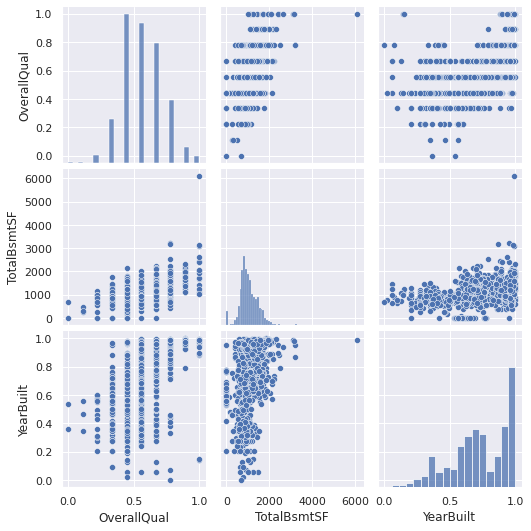

In [21]:
sns.set()
cols = ['OverallQual', 'TotalBsmtSF', 'YearBuilt']
sns.pairplot(traindata_updated_[cols], height = 2.5)
plt.show();

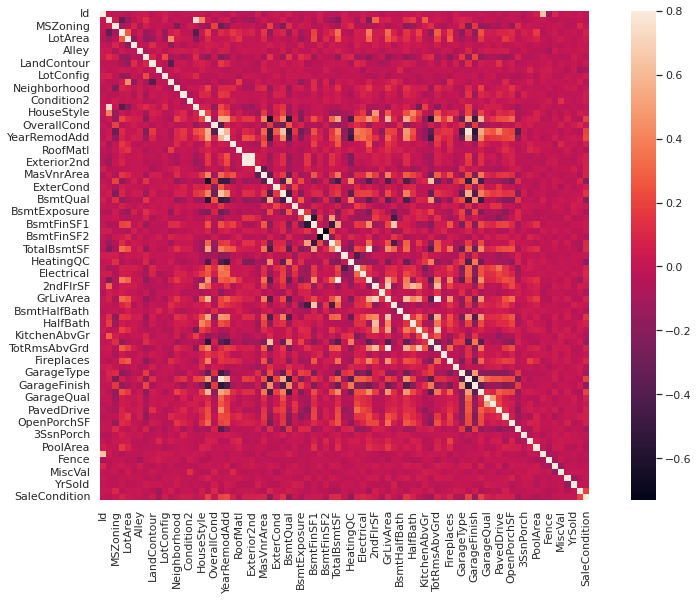

In [22]:
#Correlation matrix

corrmatrix = traindata_updated_.corr()
f, ax = plt.subplots(figsize=(15, 9))
sns.heatmap(corrmatrix, vmax=.8, square=True);

**Shuffle and Split Data**


Now all categorical variables have been converted into numerical features, and all numerical features have been normalized. As always, we will now split the data (both features and their labels) into training and test sets. 80% of the data will be used for training and 20% for testing.

In [23]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'SalePrice' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(traindata_updated_, SalePriceCheck, test_size = 0.2, random_state = 0)

**Evaluating Model Performance**


In this section, we will investigate four different algorithms, and determine which is best at modeling the data.

1. Random Forest
2. Decision Tree
3. Lasso

In [24]:
from sklearn.ensemble import RandomForestRegressor
randomforestmodel = RandomForestRegressor(n_estimators=500, n_jobs=1, random_state=101)
#randomforestmodel.fit(X_train,y_train)
from sklearn.tree import DecisionTreeRegressor
decisiontreemodel = DecisionTreeRegressor(random_state = 101)
#decisiontreemodel.fit(X_train,y_train)
from sklearn.linear_model import Lasso
lassomodel = Lasso(alpha=0.0005)
#lassomodel.fit(X_train,y_train)

To properly evaluate the performance of each model we’ve chosen, it’s important that you create a training and predicting pipeline that allows you to quickly and effectively train models using various sizes of training data and perform predictions on the testing data.

In [25]:
# TODO: Import two metrics from sklearn - fbeta_score and accuracy_score

from sklearn.metrics import mean_squared_error
from math import sqrt

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: SalePrice training set
       - X_test: features testing set
       - y_test: SalePrice testing set
    '''
    
    results = {}
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size'
    learner = learner.fit(X_train[:sample_size],y_train[:sample_size])

            
    # TODO: Compute RMSE on test set
    results['Score'] = learner.score(X_test,y_test)
        
       
    # Success
    print ("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

In [26]:
# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
samples_1 = int(round(len(X_train) / 100))
samples_10 = int(round(len(X_train) / 10))
samples_100 = len(X_train)

# Collect results on the learners
results = {}
for clf in [randomforestmodel, decisiontreemodel, lassomodel]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen
#Printing out the values
for i in results.items():
    print (i[0])
    display(pd.DataFrame(i[1]).rename(columns={0:'1%', 1:'10%', 2:'100%'}))

RandomForestRegressor trained on 12 samples.
RandomForestRegressor trained on 117 samples.
RandomForestRegressor trained on 1168 samples.
DecisionTreeRegressor trained on 12 samples.
DecisionTreeRegressor trained on 117 samples.
DecisionTreeRegressor trained on 1168 samples.
Lasso trained on 12 samples.
Lasso trained on 117 samples.
Lasso trained on 1168 samples.
RandomForestRegressor


,1%,10%,100%
Score,0.476022,0.75124,0.842443


DecisionTreeRegressor


,1%,10%,100%
Score,0.378821,0.612736,0.748351


Lasso


,1%,10%,100%
Score,-0.231241,0.320644,0.588998


Looking at the results above, we should go ahead with RandomForestRegressor

In [27]:
# TODO: Get the predictions on the test set,
randomforestmodel.fit(X_train,y_train)
predictions = randomforestmodel.predict(testdata_)

In [28]:
submission = pd.DataFrame()
submission['Id'] = testdata["Id"]
submission['SalePrice']= predictions

In [29]:
submission.to_csv("submission.csv", index=False)